In [2]:
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
import numpy as np

In [3]:
df = pd.read_csv("szl_data.csv", names = ("Anio", "Mes", "dia", "Hora", "Altura" ), header = 0)
#altura está en mm

In [4]:
df.head()

,Anio,Mes,dia,Hora,Altura
0,2016,1,1,0,670
1,2016,1,1,1,506
2,2016,1,1,2,384
3,2016,1,1,3,330
4,2016,1,1,4,356


In [5]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Anio      0
Mes       0
dia       0
Hora      0
Altura    0
dtype: int64

In [6]:
df_cl = df.dropna()

In [7]:
df_cl.Altura = pd.to_numeric(df_cl.Altura, errors='coerce')

In [8]:
df_cl['date']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'Anio'],x[u'Mes'], x[u'dia'], x[u'Hora']), "%Y %m %d %H"),axis=1)

In [9]:
df_cl.Altura.dtypes

dtype('float64')

In [10]:
df_cl.tail()

,Anio,Mes,dia,Hora,Altura,date
8779,2016,12,31,19,1180.0,2016-12-31 19:00:00
8780,2016,12,31,20,788.0,2016-12-31 20:00:00
8781,2016,12,31,21,403.0,2016-12-31 21:00:00
8782,2016,12,31,22,NaN,2016-12-31 22:00:00
8783,2016,12,31,23,NaN,2016-12-31 23:00:00


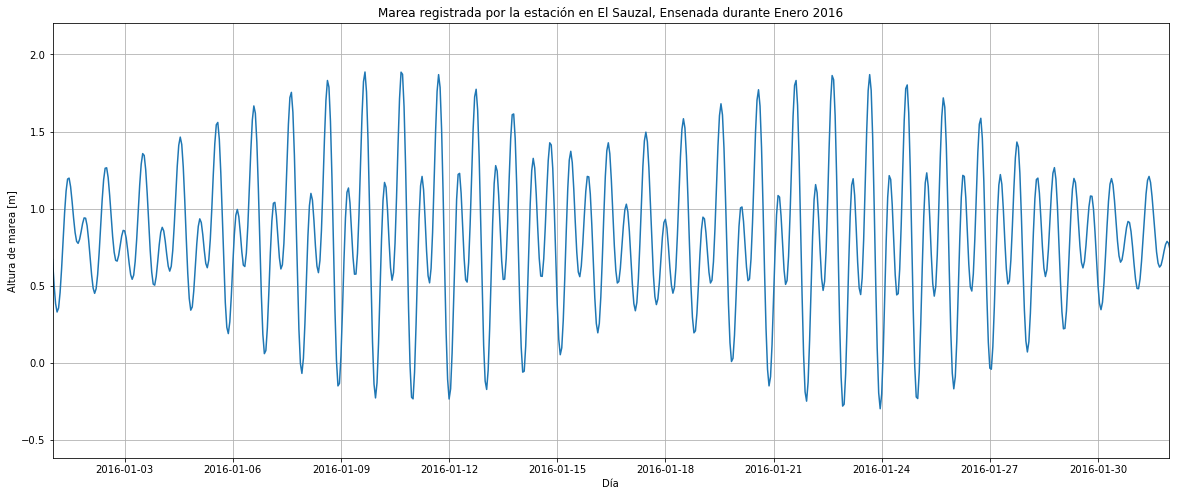

In [11]:
y= df_cl['Altura']/1000
plt.plot(df_cl['date'], y, label ="Altura")
plt.xlim(pd.Timestamp('2016-01-01 00:00:00'), pd.Timestamp('2016-01-31 23:00:00')) 
plt.ylabel('Altura de marea [m]')
plt.xlabel('Día')
plt.title('Marea registrada por la estación en El Sauzal, Ensenada durante Enero 2016')
plt.grid(True) 

fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.show()